### Importing Libraries

In [33]:
#data manipulation
import pandas as pd
import numpy as np
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#modeling
from sklearn.preprocessing import StandardScaler

In [34]:
# Read in the dataset
jumia_clothes=pd.read_csv('Jumia_clothes.csv')

In [35]:
# Print the header of the DataFrame
jumia_clothes.head()

,id,name,brand,category,price$,boutique_officielle,price,gender,price_before,promotion,reviews,numberofReviewers,Livraison_gratuite,Date
0,GE232FA1FQVNSNAFAMZ,Hoodie/Capuchon Death Note Anime - Otaku,Generic,Fashion/Men's Fashion/Clothing/Fashion Hoodies...,6.04,No,64.60 Dhs,Homme,233.00 Dhs,72%,3.2 out of 5,(81),No,2022-03-25
1,GE232MW1JMM00NAFAMZ,Hoodie Manga Naruto Anime Itachi Uchiha Sweats...,Generic,Fashion/Men's Fashion/Clothing/Fashion Hoodies...,13.92,No,149.00 Dhs,Homme,192.00 Dhs,22%,4 out of 5,(11),No,2022-03-25
2,GE232MW011137NAFAMZ,Hoodie Manga Anime Naruto Shippuden Sweatshirt...,Generic,Fashion/Men's Fashion/Clothing/Fashion Hoodies...,20.46,No,219.00 Dhs,Homme,260.00 Dhs,16%,4.5 out of 5,(19),No,2022-03-25
3,GE232FA1MGS7TNAFAMZ,Hoodie / Capuchon noir avec motif de ATTACK ON...,Generic,Fashion/Men's Fashion/Clothing/Fashion Hoodies...,7.90,No,84.55 Dhs,Homme,399.00 Dhs,79%,3.4 out of 5,(35),No,2022-03-25
4,GE232MW0X9UR9NAFAMZ,Hoodie Manga Anime Naruto Shippuden Sweatshirt...,Generic,Fashion/Men's Fashion/Clothing/Fashion Hoodies...,13.92,No,149.00 Dhs,Homme,285.00 Dhs,48%,3.3 out of 5,(33),No,2022-03-25


In [36]:
# Make the dataframe more random 
jumia_clothes = jumia_clothes.sample(frac=1, random_state=1).reset_index(drop = True)

In [37]:
# the shape of the dataframe 
jumia_clothes.shape

(45138, 14)

In [38]:
# Print columns
jumia_clothes.columns

Index(['id', 'name', 'brand', 'category', 'price$', 'boutique_officielle',
       'price', 'gender', 'price_before', 'promotion', 'reviews',
       'numberofReviewers', 'Livraison_gratuite', 'Date'],
      dtype='object')

In [39]:
# Print info of DataFrame
jumia_clothes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45138 entries, 0 to 45137
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   45138 non-null  object 
 1   name                 45138 non-null  object 
 2   brand                45138 non-null  object 
 3   category             45138 non-null  object 
 4   price$               45138 non-null  float64
 5   boutique_officielle  45138 non-null  object 
 6   price                45138 non-null  object 
 7   gender               45138 non-null  object 
 8   price_before         41738 non-null  object 
 9   promotion            41738 non-null  object 
 10  reviews              6630 non-null   object 
 11  numberofReviewers    6630 non-null   object 
 12  Livraison_gratuite   45138 non-null  object 
 13  Date                 45138 non-null  object 
dtypes: float64(1), object(13)
memory usage: 4.8+ MB


In [40]:
# show missing values
jumia_clothes.isna().sum()

id                         0
name                       0
brand                      0
category                   0
price$                     0
boutique_officielle        0
price                      0
gender                     0
price_before            3400
promotion               3400
reviews                38508
numberofReviewers      38508
Livraison_gratuite         0
Date                       0
dtype: int64

<Figure size 720x720 with 0 Axes>

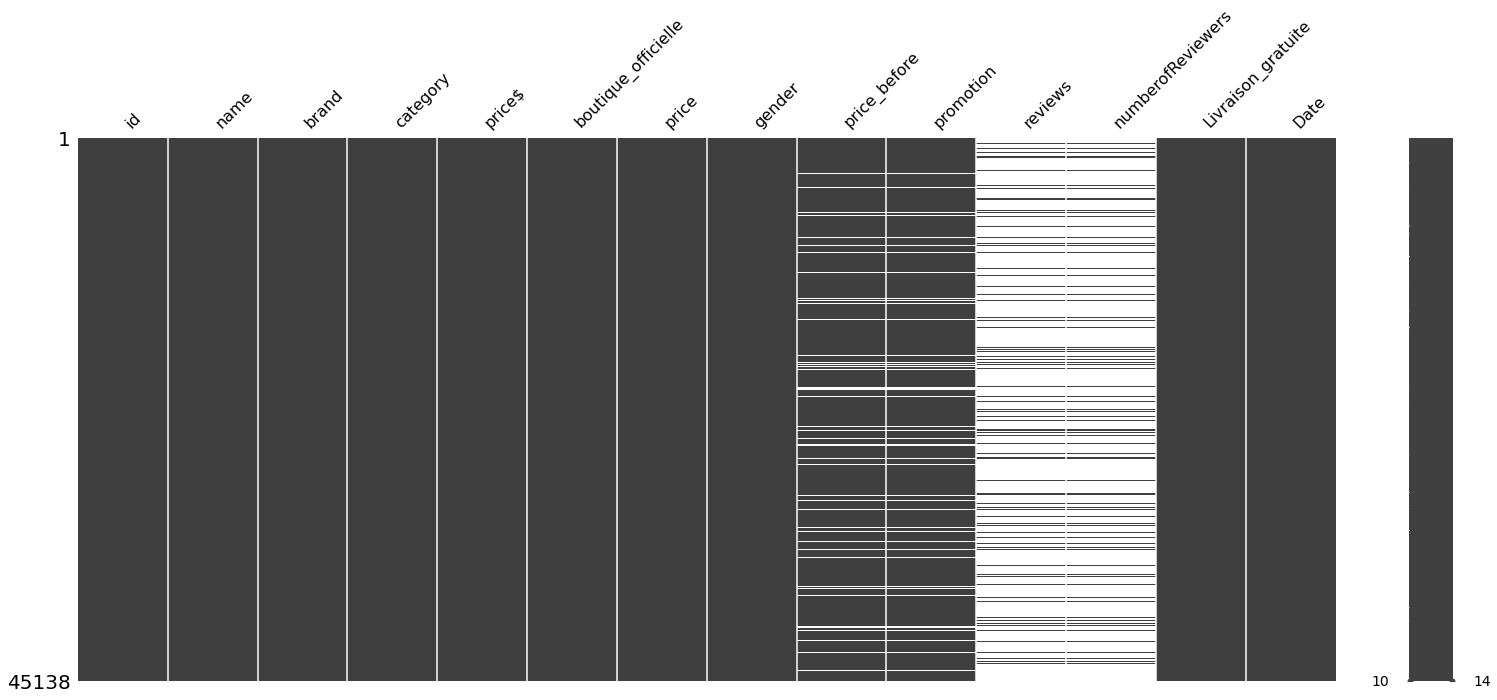

In [41]:
# Visualize the missingness
plt.figure(figsize=(10,10))
msno.matrix(jumia_clothes)
plt.show()

<Figure size 720x720 with 0 Axes>

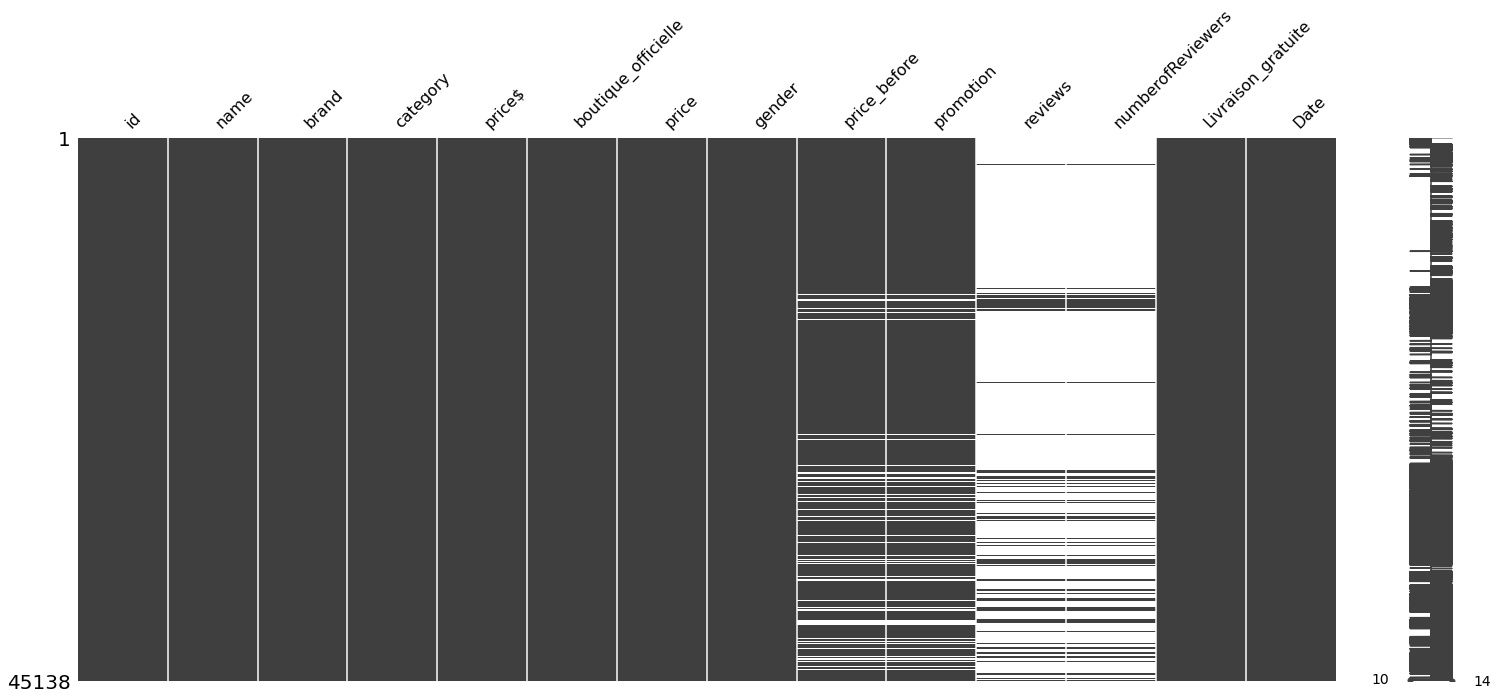

In [42]:
# Visualize the missingness on sorted values
plt.figure(figsize=(10,10))
msno.matrix(jumia_clothes.sort_values(by ='id'))
plt.show()

<AxesSubplot:>

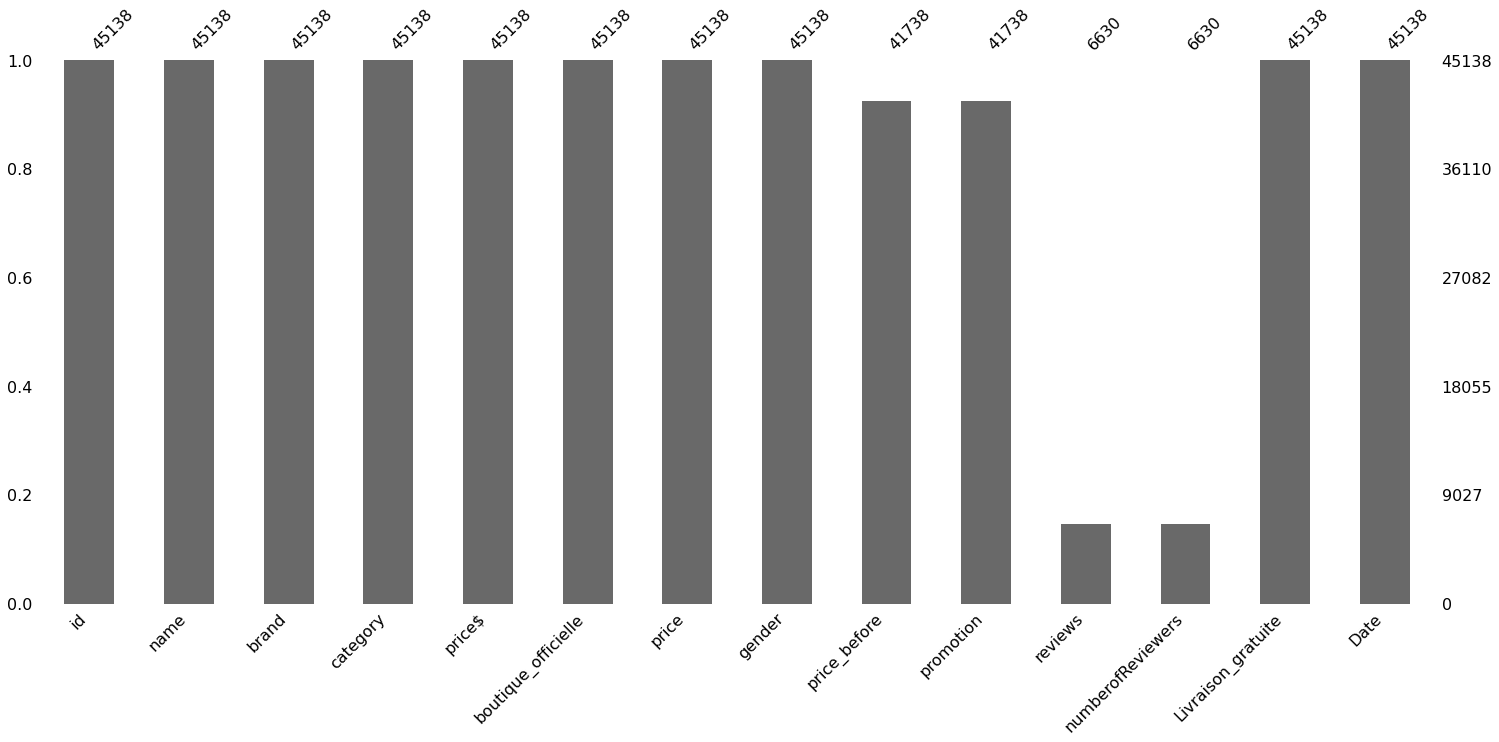

In [43]:
# Missingness barplot
msno.bar(jumia_clothes)

In [44]:
#non significant columns
jumia_clothes.drop(['id','name'],axis=1,inplace=True)

### Data Cleaning 

* ### Duplicate Data

In [45]:
jumia_clothes.duplicated().sum()

24611

In [46]:
jumia_clothes  =  jumia_clothes.drop_duplicates().reset_index(drop = True)

In [47]:
jumia_clothes.shape

(20527, 12)

* ### Missing values

In [48]:
is_rated = np.where(jumia_clothes['numberofReviewers'].isna() == True, '0', '1')
jumia_clothes['is_rated'] = is_rated
jumia_clothes = jumia_clothes.fillna({'reviews':0,
                                      'numberofReviewers':0,
                                      'promotion':0,
                                      'price_before':jumia_clothes.price})

In [49]:
# Recheck the data
jumia_clothes.isna().sum()

brand                  0
category               0
price$                 0
boutique_officielle    0
price                  0
gender                 0
price_before           0
promotion              0
reviews                0
numberofReviewers      0
Livraison_gratuite     0
Date                   0
is_rated               0
dtype: int64

# Data preparation

* ###### Price & Pricebefore

In [50]:
jumia_clothes[['price','price_before']]

,price,price_before
0,71.25 Dhs,390.00 Dhs
1,"1,199.00 Dhs","1,332.00 Dhs"
2,253.00 Dhs,361.00 Dhs
3,406.51 Dhs,406.51 Dhs
4,173.00 Dhs,216.00 Dhs
...,...,...
20522,134.50 Dhs,255.00 Dhs
20523,69.00 Dhs,129.00 Dhs
20524,162.00 Dhs,202.00 Dhs
20525,164.35 Dhs,313.50 Dhs


In [51]:
jumia_clothes.price = jumia_clothes.price.str.replace(' Dhs','')
jumia_clothes.price = jumia_clothes.price.str.split(' - ', expand=True).iloc[:,0]
jumia_clothes.price = jumia_clothes.price.str.replace(',','')
jumia_clothes.price = pd.to_numeric(jumia_clothes.price)

In [52]:
jumia_clothes.price_before = jumia_clothes.price_before.str.replace(' Dhs','')
jumia_clothes.price_before = jumia_clothes.price_before.str.split(' - ', expand=True).iloc[:,0]
jumia_clothes.price_before = jumia_clothes.price_before.str.replace(',','')
jumia_clothes.price_before = pd.to_numeric(jumia_clothes.price)

* ###### Promotion

In [53]:
jumia_clothes['promotion']=jumia_clothes['promotion'].apply(lambda x:int(x.replace('%',''))  if x!=0 else 0)

In [54]:
jumia_clothes['promotion']

0        82
1        10
2        30
3         0
4        20
         ..
20522    47
20523    47
20524    20
20525    48
20526    52
Name: promotion, Length: 20527, dtype: int64

Text(0.0, 1.0, 'distributions and relationship between price and promotion ')

<Figure size 720x720 with 0 Axes>

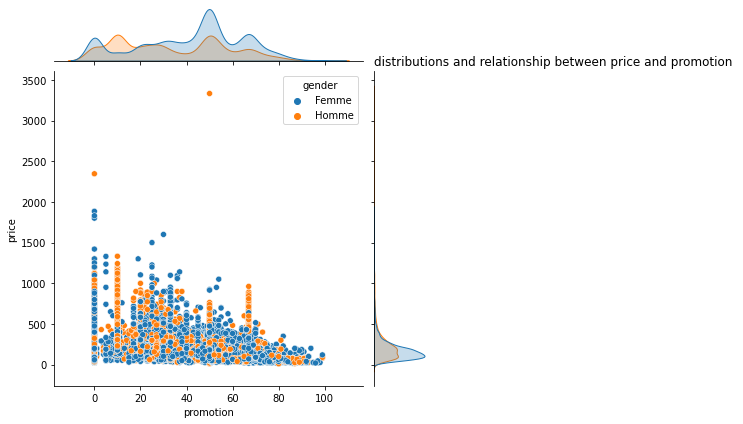

In [55]:
plt.figure(figsize=(10,10))
sns.jointplot(x='promotion',y='price',hue='gender',data=jumia_clothes)
plt.title('distributions and relationship between price and promotion ',loc='left')

* ###### Reviews

In [56]:
jumia_clothes['reviews']=jumia_clothes['reviews'].apply(lambda x:x.split(' ')[0] if x!=0 else x).astype('float')

In [57]:
jumia_clothes['reviews']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20522    0.0
20523    3.7
20524    0.0
20525    0.0
20526    3.0
Name: reviews, Length: 20527, dtype: float64

C:\Users\EliteBook\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


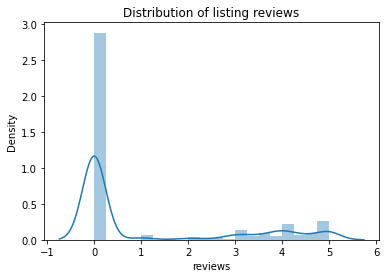

In [58]:
sns.distplot(jumia_clothes['reviews'], bins = 20)
plt.title('Distribution of listing reviews')
plt.show()

In [59]:
reviews_0_2=jumia_clothes[jumia_clothes.reviews<=2]
reviews_2_4=jumia_clothes[(jumia_clothes.reviews>2) & (jumia_clothes.reviews<=4) ]
reviews_4above=jumia_clothes[jumia_clothes.reviews>4]

In [60]:
reviewsx=['0-2','3-4','5']
reviewsy=[len(reviews_0_2.values),len(reviews_2_4.values),len(reviews_4above.values)]

Text(0.5, 1.0, 'counts of reviews')

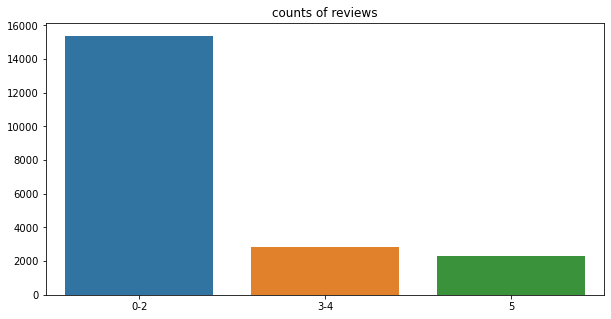

In [61]:
plt.figure(1,figsize=(10,5))
sns.barplot(x=reviewsx,y=reviewsy)
plt.title('counts of reviews')

* ###### NumberofReviewers

In [62]:
jumia_clothes['numberofReviewers']=jumia_clothes['numberofReviewers'].apply(lambda x:x.strip('()') if x!=0 else x).astype(int)

* ###### Datetime

In [63]:
jumia_clothes.Date = pd.to_datetime(jumia_clothes.Date)

* ###### Category

C:\Users\EliteBook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


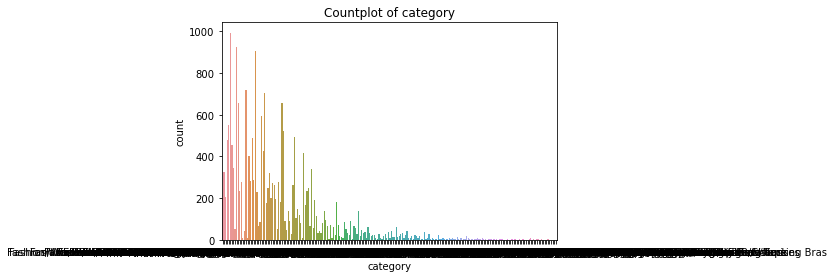

In [64]:
sns.countplot(jumia_clothes['category'])
plt.title('Countplot of category')
plt.show()

In [65]:
jumia_clothes['Type']=jumia_clothes['category'].str.strip('Fashion/').str.split('/',expand=True)[1]
jumia_clothes['category']=jumia_clothes['category'].str.strip('Fashion/').str.split('/',expand=True)[2]

In [66]:
jumia_clothes = jumia_clothes[jumia_clothes['Type']=='Clothing']

* ###### Brand

In [67]:
jumia_clothes.brand.value_counts()

Generic                5229
Fashion                3908
Autre                  2564
Koton                  1331
Trendyol Collection     989
                       ... 
Pim Kie                   1
Rijona                    1
Berlei                    1
Volkswagen                1
Hot Shapers               1
Name: brand, Length: 346, dtype: int64

In [68]:
brands = jumia_clothes['brand'].value_counts()

In [69]:
FamousBrands = brands[brands > 400 ]

In [70]:
FamousBrands

Generic                5229
Fashion                3908
Autre                  2564
Koton                  1331
Trendyol Collection     989
Defacto                 644
Zanzea                  463
Ageneral                459
Refka By Modanisa       404
Name: brand, dtype: int64

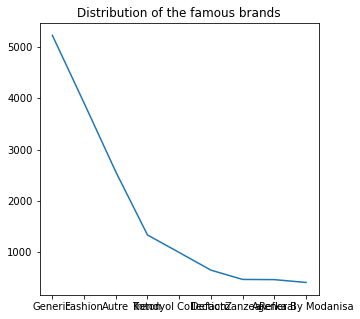

In [71]:
plt.figure(figsize = (5,5))
plt.plot(FamousBrands)
plt.title('Distribution of the famous brands')
plt.show()

In [72]:
jumia_clothes.brand=jumia_clothes.brand.apply(lambda x:x if x in ['Fashion','Generic','Autre','Koton','Trendyol Collection','Ageneral','Defacto','Zanzea','ADDAX Fashion','Refka By Modanisa','SHEIN','Tofisa by Modanisa'] else np.nan) 

In [73]:
jumia_clothes.isna().sum()

brand                  3652
category                  0
price$                    0
boutique_officielle       0
price                     0
gender                    0
price_before              0
promotion                 0
reviews                   0
numberofReviewers         0
Livraison_gratuite        0
Date                      0
is_rated                  0
Type                      0
dtype: int64

In [74]:
jumia_clothes.dropna(subset=['brand'],inplace=True)

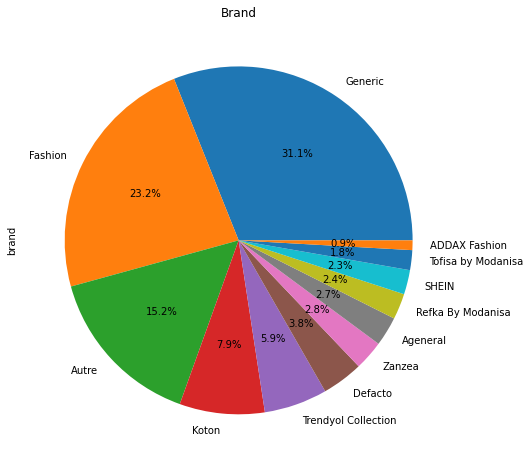

In [75]:
plt.figure(figsize=(10,8))
jumia_clothes['brand'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Brand')
plt.show()

* ###### Livraison_gratuite

In [76]:
jumia_clothes.Livraison_gratuite.value_counts()

No     15194
Yes     1640
Name: Livraison_gratuite, dtype: int64

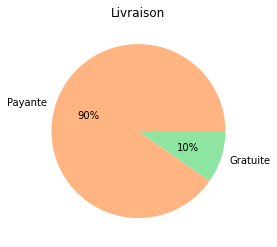

In [77]:
colors = sns.color_palette('pastel')[1:3]
plt.pie(jumia_clothes['Livraison_gratuite'].value_counts(),labels = ['Payante','Gratuite'], colors = colors, autopct='%.0f%%')
plt.title('Livraison')
plt.show()

* ###### Boutique_officielle

In [78]:
jumia_clothes.boutique_officielle.value_counts()

No     13583
Yes     3251
Name: boutique_officielle, dtype: int64

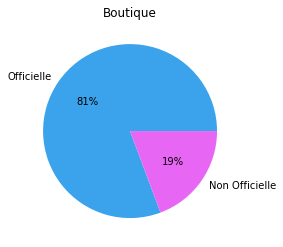

In [79]:
colors = sns.color_palette('husl')[4:6]
plt.pie(jumia_clothes['boutique_officielle'].value_counts(),labels = ['Officielle','Non Officielle'], colors = colors, autopct='%.0f%%')
plt.title('Boutique')
plt.show()

* ###### Gender

In [80]:
jumia_clothes.gender.value_counts()

Femme    9873
Homme    6961
Name: gender, dtype: int64

C:\Users\EliteBook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

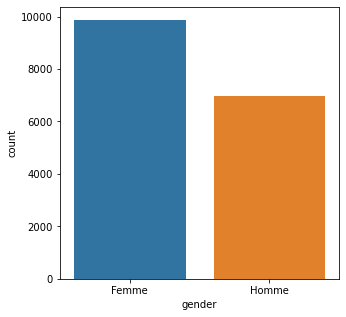

In [81]:
plt.figure(figsize = (5,5))
sns.countplot(jumia_clothes['gender'])

<AxesSubplot:xlabel='gender', ylabel='price'>

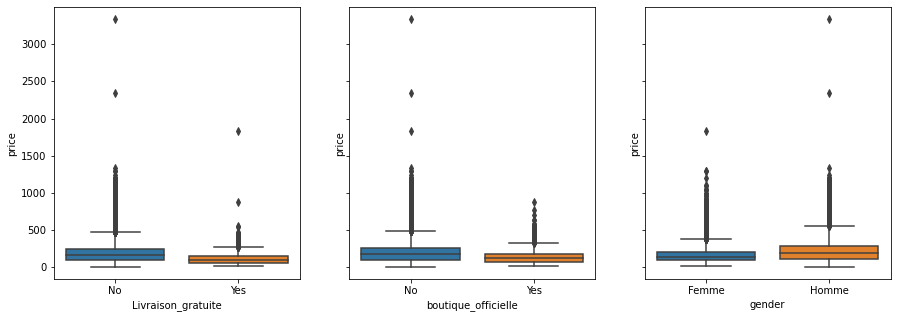

In [82]:
fig,axes= plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.boxplot(ax= axes[0] , data= jumia_clothes, x="Livraison_gratuite" , y="price")
sns.boxplot(ax= axes[1] , data= jumia_clothes, x="boutique_officielle" , y="price")
sns.boxplot(ax= axes[2] , data= jumia_clothes, x="gender" , y="price")

<AxesSubplot:xlabel='gender', ylabel='price'>

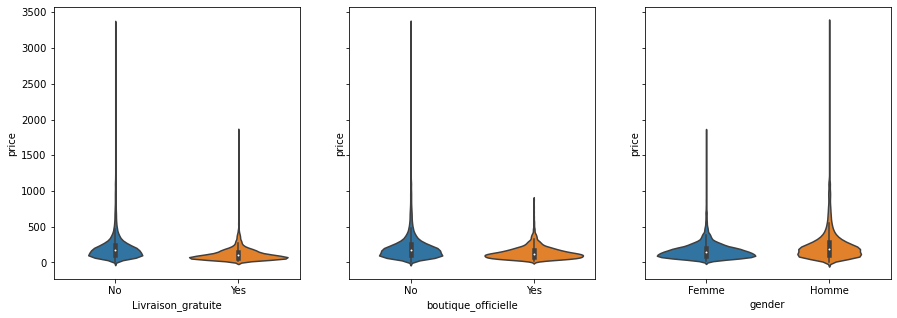

In [83]:
fig,axes= plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.violinplot(ax= axes[0] , data= jumia_clothes, x="Livraison_gratuite" , y="price")
sns.violinplot(ax= axes[1] , data= jumia_clothes, x="boutique_officielle" , y="price")
sns.violinplot(ax= axes[2] , data= jumia_clothes, x="gender" , y="price")

In [84]:
numerical_cols = jumia_clothes.select_dtypes(include =['int','float'])
numerical_cols.head()

,price$,price,price_before,promotion,reviews,numberofReviewers
0,6.66,71.25,71.25,82,0.0,0
1,112.04,1199.00,1199.00,10,0.0,0
2,23.64,253.00,253.00,30,0.0,0
3,37.99,406.51,406.51,0,0.0,0
4,16.17,173.00,173.00,20,0.0,0


<Figure size 2160x2160 with 0 Axes>

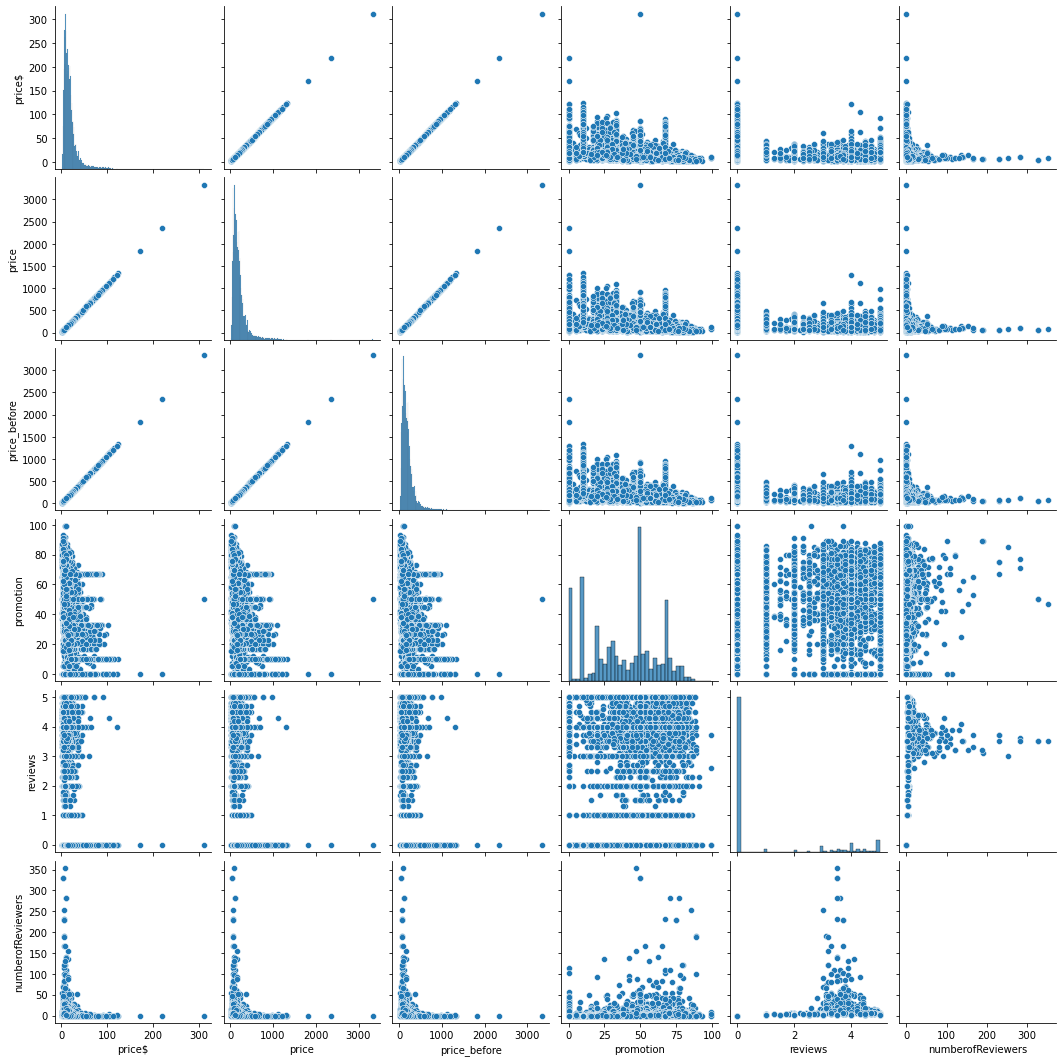

In [85]:
plt.figure(figsize = (30,30))
sns.pairplot(numerical_cols)
plt.show()

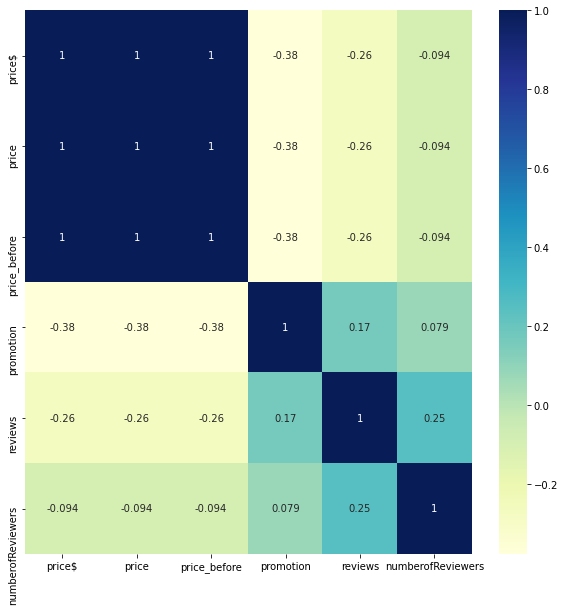

In [86]:
plt.figure(figsize = (10,10))
sns.heatmap(jumia_clothes.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

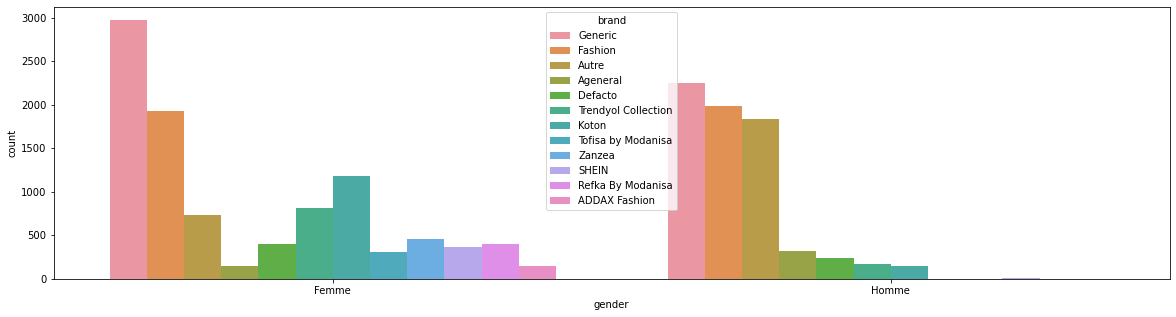

In [87]:
plt.figure(figsize=(20,5))
sns.countplot(x='gender',hue='brand',data=jumia_clothes )

the brand generic is the most used among women and men and we can see also that there are some brands that are exclusive for women 

<AxesSubplot:xlabel='gender', ylabel='count'>

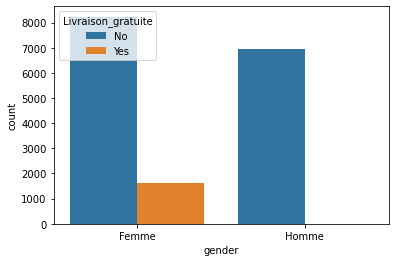

In [88]:
sns.countplot(x='gender',hue='Livraison_gratuite',data=jumia_clothes )

it seems that there is no free delivery for men

<AxesSubplot:xlabel='gender', ylabel='count'>

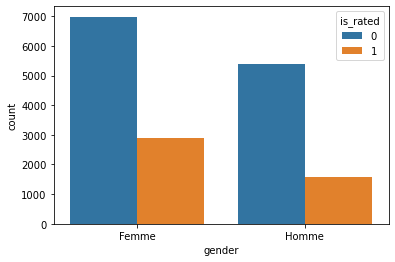

In [89]:
sns.countplot(x='gender',hue='is_rated',data=jumia_clothes )

<AxesSubplot:xlabel='Livraison_gratuite'>

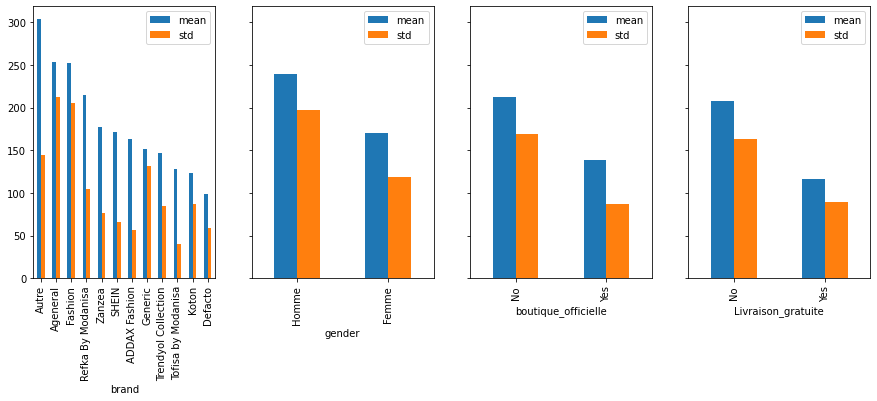

In [90]:
fig,axes= plt.subplots(1, 4, figsize=(15, 5), sharey=True)
jumia_clothes.groupby('brand')['price'].agg(['mean','std']).sort_values(['mean'],ascending=False).plot(ax=axes[0],kind='bar')
jumia_clothes.groupby('gender')['price'].agg(['mean','std']).sort_values(['mean'],ascending=False).plot(ax=axes[1],kind='bar')
jumia_clothes.groupby('boutique_officielle')['price'].agg(['mean','std']).sort_values(['mean'],ascending=False).plot(ax=axes[2],kind='bar')
jumia_clothes.groupby('Livraison_gratuite')['price'].agg(['mean','std']).sort_values(['mean'],ascending=False).plot(ax=axes[3],kind='bar')

In [91]:
# Recheck the data
jumia_clothes.head()

,brand,category,price$,boutique_officielle,price,gender,price_before,promotion,reviews,numberofReviewers,Livraison_gratuite,Date,is_rated,Type
0,Generic,"Lingerie, Sleep & Lounge",6.66,No,71.25,Femme,71.25,82,0.0,0,No,2022-03-25,0,Clothing
1,Fashion,Suits & Sport Coats,112.04,No,1199.00,Homme,1199.00,10,0.0,0,No,2022-03-25,0,Clothing
2,Fashion,Shirts,23.64,No,253.00,Homme,253.00,30,0.0,0,No,2022-03-25,0,Clothing
3,Generic,"Jumpsuits, Rompers & Overalls",37.99,No,406.51,Femme,406.51,0,0.0,0,No,2022-03-25,0,Clothing
4,Autre,Short,16.17,No,173.00,Homme,173.00,20,0.0,0,No,2022-03-25,0,Clothing


# Data Preprocessing

* ###### Categorical features

In [92]:
categorical_cols = jumia_clothes.select_dtypes(include = ['object'])
categorical_cols.head()

,brand,category,boutique_officielle,gender,Livraison_gratuite,is_rated,Type
0,Generic,"Lingerie, Sleep & Lounge",No,Femme,No,0,Clothing
1,Fashion,Suits & Sport Coats,No,Homme,No,0,Clothing
2,Fashion,Shirts,No,Homme,No,0,Clothing
3,Generic,"Jumpsuits, Rompers & Overalls",No,Femme,No,0,Clothing
4,Autre,Short,No,Homme,No,0,Clothing


In [93]:
#creating dummies for categorical data
clothes_dummies=pd.get_dummies(categorical_cols)

In [94]:
clothes_df  = pd.concat([jumia_clothes, clothes_dummies], axis =1)

In [95]:
clothes_df = clothes_df.drop(['brand', 'category','boutique_officielle', 'gender',
       'Livraison_gratuite', 'Type'], axis =1)

* ###### Numerical features

In [96]:
col_list = ['price$','price','promotion','reviews','numberofReviewers']

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [98]:
clothes_df[col_list] = scaler.fit_transform(clothes_df[col_list])

In [99]:
# Recheck the data
clothes_df.head()

,price$,price,price_before,promotion,reviews,numberofReviewers,Date,is_rated,brand_ADDAX Fashion,brand_Ageneral,...,category_Underwear,boutique_officielle_No,boutique_officielle_Yes,gender_Femme,gender_Homme,Livraison_gratuite_No,Livraison_gratuite_Yes,is_rated_0,is_rated_1,Type_Clothing
0,0.018452,0.018432,71.25,0.828283,0.0,0.0,2022-03-25,0,0,0,...,0,1,0,1,0,1,0,1,0,1
1,0.357808,0.357809,1199.00,0.101010,0.0,0.0,2022-03-25,0,0,0,...,0,1,0,0,1,1,0,1,0,1
2,0.073133,0.073127,253.00,0.303030,0.0,0.0,2022-03-25,0,0,0,...,0,1,0,0,1,1,0,1,0,1
3,0.119344,0.119323,406.51,0.000000,0.0,0.0,2022-03-25,0,0,0,...,0,1,0,1,0,1,0,1,0,1
4,0.049077,0.049052,173.00,0.202020,0.0,0.0,2022-03-25,0,0,0,...,0,1,0,0,1,1,0,1,0,1


### Split the data

In [100]:
clothes_df.drop(['Date' , 'price$' , 'price_before'] , inplace = True , axis = 1)

In [101]:

from sklearn.model_selection import train_test_split
X_train , X_test= train_test_split(clothes_df, train_size = 0.75, test_size = 0.25, random_state = 2001)

In [102]:
y_train = X_train.pop('price')
y_test = X_test.pop('price')

### Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lr = LinearRegression()
model=lr.fit(X_train,y_train)

In [105]:
y_pred = model.predict(X_test)

In [106]:
y_pred

array([0.04362488, 0.07243347, 0.04930115, ..., 0.19337463, 0.00894165,
       0.02055359])

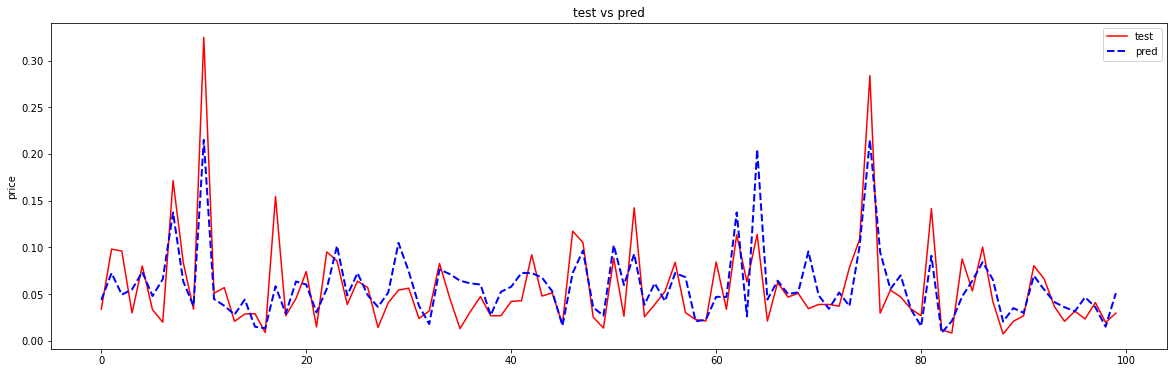

In [107]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(y_test)[:100] , color='r', label='test')
plt.plot(y_pred[:100], color='b',linestyle='dashed',
     linewidth=2 ,label='pred')
  
# Naming the x-axis, y-axis and the whole graph

plt.ylabel("price")
plt.title("test vs pred")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [108]:
from sklearn.metrics import r2_score , mean_squared_error
mse = mean_squared_error(y_test,y_pred)

In [109]:
mse

0.001059003656537134

In [110]:
r_squ = r2_score(y_test,y_pred)
r_squ

0.5155219997792966

### RandomForestRegressor

In [111]:
from sklearn.ensemble import RandomForestRegressor

RFmodel = RandomForestRegressor(n_estimators= 110)
model1 = RFmodel.fit(X_train , y_train)

In [112]:
from pprint import pprint
print('Parameters currently in use:\n')

pprint(model1.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 110,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [113]:
y_pred1 = model1.predict(X_test)

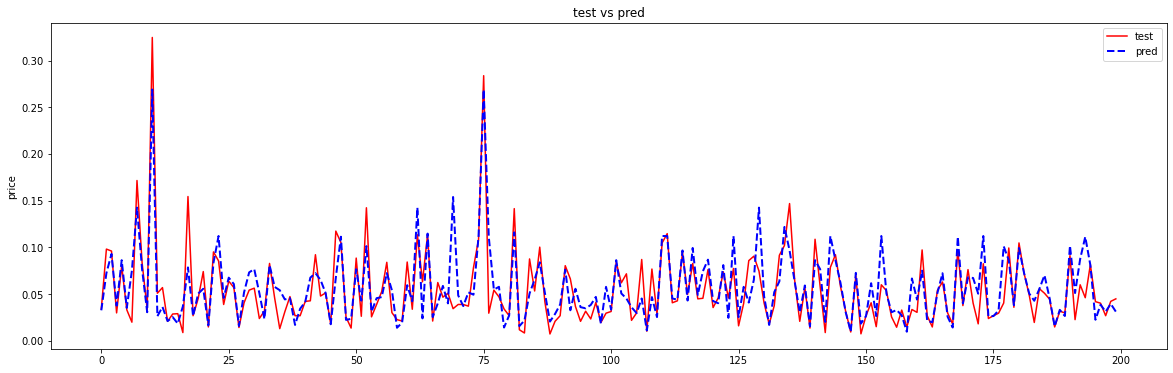

In [247]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(y_test)[:200] , color='r', label='test')
plt.plot(y_pred1[:200], color='b',linestyle='dashed',
     linewidth=2 ,label='pred')
  
# Naming the x-axis, y-axis and the whole graph

plt.ylabel("price")
plt.title("test vs pred")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [114]:
model1.score(X_test,y_test)

0.6347725692115016

### SVR

In [238]:
from sklearn.svm import SVR
svr = SVR(C=1.0, epsilon=0.2)
model2 = svr.fit(X_train,y_train)

In [239]:
y_pred2 = model2.predict(X_test)

In [237]:
model2.score(X_test , y_test)

-9.05279861170344

### KNeighborsRegressor

In [241]:
from sklearn.neighbors import KNeighborsRegressor

In [242]:
neigh = KNeighborsRegressor(n_neighbors=2)
model3 = neigh.fit(X_train, y_train)

In [243]:
model3.score(X_test,y_test)

0.37241186845084273

### GradientBoostingRegressor

In [244]:
from sklearn.ensemble import GradientBoostingRegressor
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [245]:
reg = GradientBoostingRegressor(**params)
model4 = reg.fit(X_train, y_train)

In [246]:
model4.score(X_test,y_test)

0.5973412164197767

### hyperparameters tuning for RandomForestRegressor

In [115]:
param_grid = {
    'bootstrap': [True],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 200, 300]
}

In [116]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_features': [2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [117]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [118]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test,y_test)

0.6360730616368785